<a href="https://colab.research.google.com/github/jzhengzhi/KU_Natural-Language_202501/blob/main/midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install selenium

In [95]:
from selenium import webdriver
from selenium.webdriver.common.by import By

URL = "https://land.naver.com/news/headline.naver"

options = webdriver.ChromeOptions()
options.add_argument(" --headless")
options.add_argument(" --disable-dev-shm-usage")
options.add_argument(" --no-sandbox")
driver = webdriver.Chrome(options=options)
driver.get(URL)
print(driver.title)

주요뉴스, 뉴스 : 내집마련의 시작, 네이버페이 부동산


In [96]:
title = driver.find_elements(By.CLASS_NAME, 'title')
for tmp in title:
    print(tmp.text)

“요즘 보기 드문 집이네”…친정·시어머니 동거 과천 청약 당첨자, 알고 보니 ‘꼼수’
심상치 않은 롯데건설…"PF는 줄었는데 돈이 안 돈다" [Why&Next]
‘얼죽신’ 때문에 이런 짓까지…가짜 결혼·가짜 이혼 판 치는 청약시장
‘영끌’ 대신 투자받아 내집 마련…지분형 모기지 나온다
‘입주하면 집값 하락’ 옛말…꺾일 줄 모르는 서울 신축 아파트
'부채비율 589%' 금호건설, '신용등급'도 없는 이유
GS건설, 4400억 투자해 '1.2조' 매각 성공할까
"한강변 랜드마크 사수"…용산·압구정·성수·여의도 수주전 개막
"재개발해도 쭉 한강뷰"…선우용여 아파트 어디길래 [집코노미-핫!부동산]
대선 한 달 앞두고…"우리 집 살까" 관심 폭발한 아파트 [주간이집]
"-400만원 마통이 24억 됐다"…가계부 쓰는 직장인, 대박 난 비결
위장전입부터 가짜결혼까지…390건 청약 부정 적발
"사돈까지 한집에서 15년?" 국토부 주택 부정청약 390건 적발
이완용 후손, `30억 돈벼락`…나라 판 돈 들고 해외 떠났다
100억대 원베일리, 샴푸도둑 때문에 공용품 지급 중단[부동산360]
‘임장크루’ 몰려들자… 공인중개사협회 ‘임장비’ 추진 논란 가열
"강남 재건축 '대어' 잡아라"…개포우성7차 격전 [현장]
"50층 넘는 아파트 안돼"…서울시가 재건축 '제동' 건 이유
“전셋값 오히려 오른다” “임대인 희생 강요” 조기 대선 시작…임대차2법 손질되나[부동산360]
이완용 증손자 북아현동 700평 땅 찾아 ‘돈벼락’…나라 판 돈 들고 해외로


In [97]:
btn_page = driver.find_element(By.CSS_SELECTOR, 'a.next')

#overlapping_element = driver.find_element(By.CSS_SELECTOR, '#contents > div.prod_detail_footer')
#driver.execute_script("arguments[0].remove()", overlapping_element)

In [98]:
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

#last_page = soup.select_one("#pagination > a.NP\\=r\\:11")
#last_page_num = int(last_page.get_text())
last_page_num = 11

In [99]:
titles_list = []

base_url = "https://land.naver.com/news/headline.naver?page="

for page in range(1, last_page_num + 1):
    driver.get(base_url + str(page))
    time.sleep(1)

    titles = driver.find_elements(By.CLASS_NAME, 'title')
    for t in titles:
        titles_list.append(t.text)

driver.quit()

In [100]:
!pip install konlpy wordcloud matplotlib > /dev/null
!apt-get -qq install fonts-nanum

Selecting previously unselected package fonts-nanum.
(Reading database ... 126101 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [101]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

In [102]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

# 1) 텍스트 하나로 결합
full_text = ' '.join(titles_list)

# 2) 형태소 분석기 이용해 명사 추출
okt = Okt()
nouns = okt.nouns(full_text)

# 3) 불용어 제거 + 한 글자 제거
stopwords = set(['뉴스', '기자', '보도', '오늘', '정부', '이후', '때문', '관련', '위해'])
filtered = [n for n in nouns if len(n) > 1 and n not in stopwords]

# 4) 빈도수 계산
word_freq = Counter(filtered)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45348 (\N{HANGUL SYLLABLE NE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

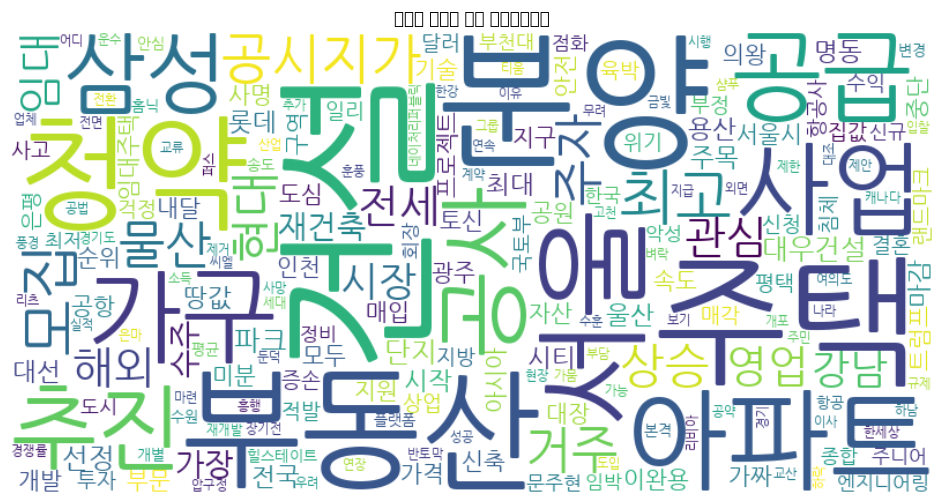

In [103]:
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(word_freq)

# 출력
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("네이버 부동산 뉴스 워드클라우드")
plt.show()